In [15]:
# Unsupervised Machine Learning
# t-SNE visualization of a stock dataset

# t-SNE = "t-distributed stochastic neighbor embedding"
# Maps samples to 2D space (or3D)
# Map approximately preserves nearness of samples Great for inspecting datasets
# NOTE map is rand-gen every time and the axises dont mean anything at all
# It is important to note that t-SNE is not a machine learning algorithm in the traditional
# sense of supervised or unsupervised learning. It does not involve training a model on a labeled dataset
# to make predictions or learn patterns in the data. Instead, t-SNE is a technique for 
# visualizing and exploring the structure of high-dimensional data.

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize


# Load df
stock_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/company-stock-movements-2010-2015-incl.csv')

# Create array for model
stock_arr = stock_df.iloc[:,1:].values

# Create a list of the company names
company_names = stock_df.iloc[:,0].values.tolist()

# Normalize the stock data
norm = normalize(stock_arr)

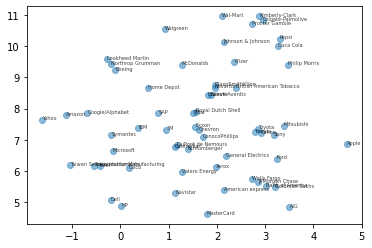

In [16]:
# Creating the TSNE model instance called model with learning_rate=200.
model = TSNE(learning_rate=50)

# Transforming
# Applying fit_transform to seeds_arr
# NOTE that fit_transform simultaneously fits the model and transforms the data
# This means that you can not extend the map to include new data samples, the process must be restarted each time.
tsne_features = model.fit_transform(norm)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]


# Create Scatterplot and color based on the variety numbers parsed earlier
# We are showing the plot of the observations, and the potential classes by color.
# This helps us understand our clustering models better.
plt.scatter(xs, ys, alpha= 0.5)

# Annotate the points
# The zip() functin is a built-in function in Python that takes two or more
# iterables (e.g. lists, tuples, or other sequences) as arguments and returns an iterator that aggregates elements
# from each of the iterables as tuples.can be useful for many tasks, such as combining data from multiple sources, 
# iterating over multiple sequences simultaneously, and creating dictionaries from two parallel lists. 
# ie. here it is taking the positions from the features arrays and the list of company names and packaging them together
# so that we can instantly draw them out, then apply them in the loop to the points via plt.annotate()
for x, y, company in zip(xs, ys, company_names):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)

plt.show()